# Transfer learning for check if plant available in image

In [36]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

In [5]:
custom_input = Input(shape=(256, 256, 3))
base_model = InceptionV3(input_tensor=custom_input,
                         weights='imagenet',
                         include_top=True)
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_166 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_165 (Batch  (None, 127, 127, 32  96         ['conv2d_166[0][0]']             
 Normalization)                 )                                                      

In [18]:
test_input = load_img(
    path='../data/image data/test/Orange/Haunglongbing (Citrus greening)/c204b397-cdbf-481f-84d5-72f9e16cfa79___CREC_HLB 7560.JPG',
    target_size=(256, 256))
test_input = img_to_array(test_input)
test_input = test_input.reshape((1, 256, 256, 3))
test_input.shape

(1, 256, 256, 3)

In [20]:
base_model.predict(test_input).max()

0.9942251

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
train_data = unpickle('../data/Plant/not plant/cifar-100-python/train')
train_data

{b'filenames': [b'bos_taurus_s_000507.png',
  b'stegosaurus_s_000125.png',
  b'mcintosh_s_000643.png',
  b'altar_boy_s_001435.png',
  b'cichlid_s_000031.png',
  b'phone_s_002161.png',
  b'car_train_s_000043.png',
  b'beaker_s_000604.png',
  b'fog_s_000397.png',
  b'rogue_elephant_s_000421.png',
  b'computer_keyboard_s_000757.png',
  b'willow_tree_s_000645.png',
  b'sunflower_s_000549.png',
  b'palace_s_000759.png',
  b'adriatic_s_001782.png',
  b'computer_keyboard_s_001277.png',
  b'bike_s_000682.png',
  b'wolf_pup_s_001323.png',
  b'squirrel_s_002467.png',
  b'sea_s_000678.png',
  b'shrew_s_002233.png',
  b'pine_tree_s_000087.png',
  b'rose_s_000373.png',
  b'surveillance_system_s_000769.png',
  b'pine_s_001533.png',
  b'table_s_000897.png',
  b'opossum_s_001237.png',
  b'quercus_alba_s_000257.png',
  b'leopard_s_000414.png',
  b'possum_s_002195.png',
  b'bike_s_000127.png',
  b'balmoral_castle_s_000361.png',
  b'acer_saccharinum_s_000646.png',
  b'lapin_s_000916.png',
  b'chimp_s_001

In [6]:
train_data[b'data']

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

In [40]:
images = []

for i in range(train_data[b'data'].shape[0]):
    images.append(np.transpose(np.reshape(train_data[b'data'][i], (3, 32, 32)), (1, 2, 0)))

In [42]:
images = np.array(images)
images.shape

(50000, 32, 32, 3)

In [43]:
train_data.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [44]:
for i in range(len(train_data[b'fine_labels'])):
    class_ = f"../data/Plant/not plant/class_{train_data[b'coarse_labels'][i]}"
    if not os.path.isdir(class_):
        os.mkdir(class_)

    dst = os.path.join(f"../data/Plant/not plant/class_{train_data[b'coarse_labels'][i]}",
                       str(train_data[b'filenames'][i].decode("utf-8")))
    image = array_to_img(images[i])
    image.save(dst)

In [32]:
train_data[b'filenames'][0].decode("utf-8")

'bos_taurus_s_000507.png'

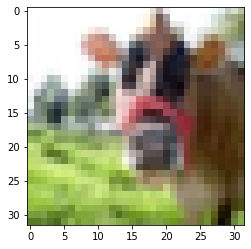

In [41]:
plt.imshow(images[0])